In [1]:
import pandas as pd

In [43]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [3]:
data = pd.read_csv('prius-test.csv', header=1)

In [4]:
data.head()

,Time (sec),Latitude (deg),Longitude (deg),Vehicle speed (MPH)
0,0.000,30.31536,-97.68586,0.0
1,0.993,30.31536,-97.68586,0.0
2,1.997,30.31536,-97.68586,0.0
3,118.017,30.31538,-97.68585,0.0
4,119.000,30.31539,-97.68587,0.0


In [5]:
data.index

RangeIndex(start=0, stop=260, step=1)

In [6]:
data.columns

Index(['Time (sec)', ' Latitude (deg)', ' Longitude (deg)',
       ' Vehicle speed (MPH)'],
      dtype='object')

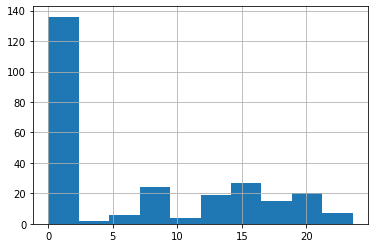

In [7]:
data[' Vehicle speed (MPH)'].hist()

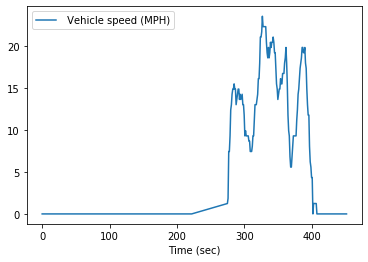

In [8]:
data.plot.line(x='Time (sec)',y=' Vehicle speed (MPH)')

In [35]:
%%time
pathway = '../atx_geo_data/street_centerline/'
atx = gpd.read_file(pathway)#, SHAPE_RESTORE_SHX=yes)

CPU times: user 4.05 s, sys: 325 ms, total: 4.38 s
Wall time: 4.4 s


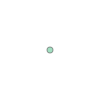

In [58]:
drive[8]

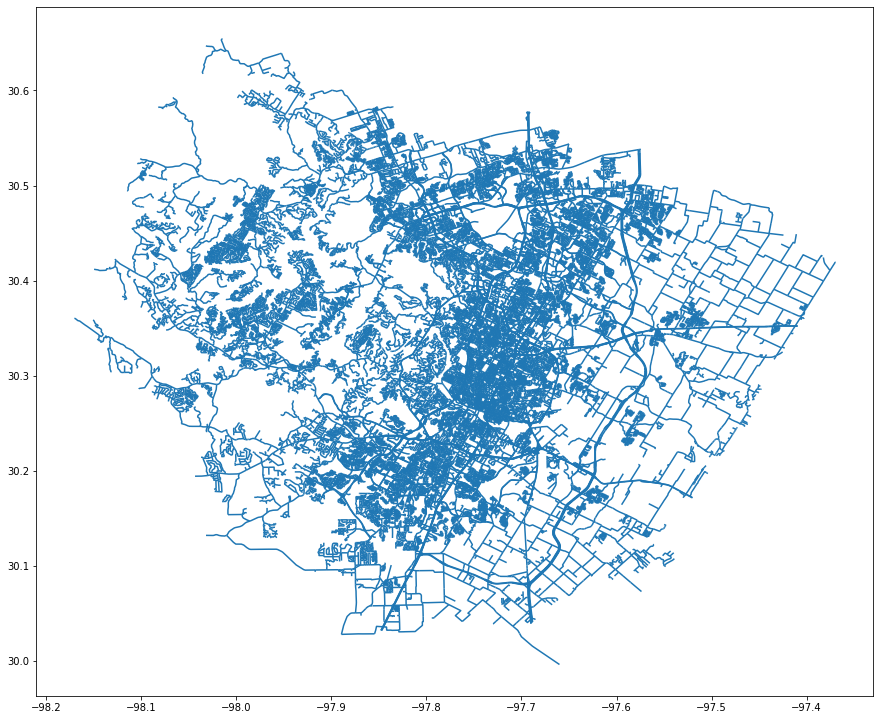

In [38]:
fig, ax = plt.subplots(figsize = (15,15))
atx.plot(ax = ax)

In [51]:
drive = [Point(xy) for xy in zip(data[' Longitude (deg)'], data[' Latitude (deg)'])]
crs = {'init':'epsg:4326'}

In [69]:
#plot still works w/ crs hashed out
geo_df = gpd.GeoDataFrame(data,
#                         crs = crs,
                         geometry = drive)

In [70]:
geo_df.head()

,Time (sec),Latitude (deg),Longitude (deg),Vehicle speed (MPH),geometry
0,0.000,30.31536,-97.68586,0.0,POINT (-97.68586 30.31536)
1,0.993,30.31536,-97.68586,0.0,POINT (-97.68586 30.31536)
2,1.997,30.31536,-97.68586,0.0,POINT (-97.68586 30.31536)
3,118.017,30.31538,-97.68585,0.0,POINT (-97.68585 30.31538)
4,119.000,30.31539,-97.68587,0.0,POINT (-97.68587 30.31539)


In [71]:
geo_df.columns

Index(['Time (sec)', ' Latitude (deg)', ' Longitude (deg)',
       ' Vehicle speed (MPH)', 'geometry'],
      dtype='object')

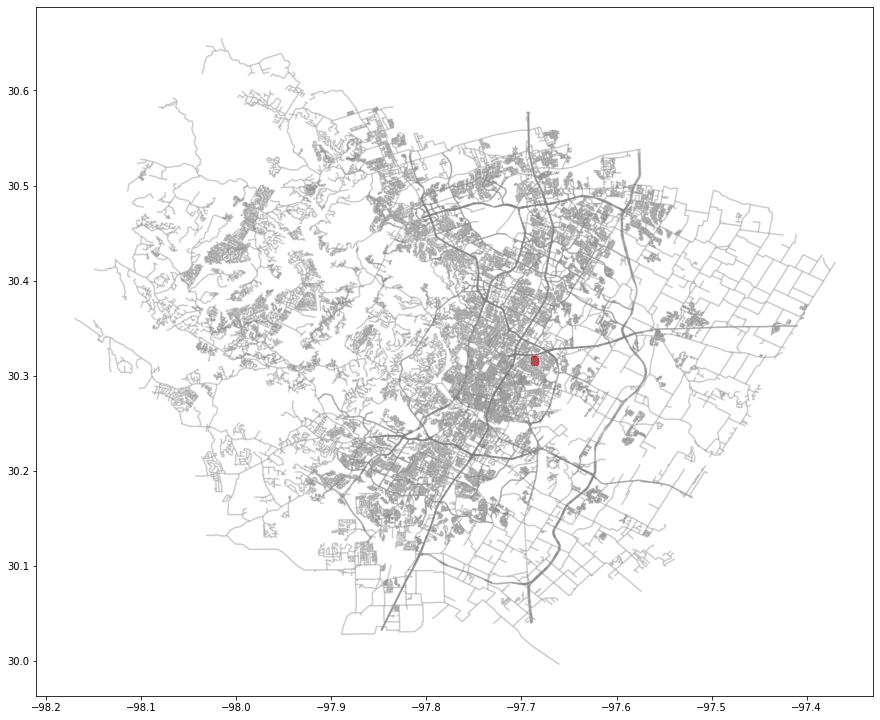

In [72]:
fig, ax = plt.subplots(figsize = (15,15))
atx.plot(ax = ax, alpha=0.4, color='grey')
geo_df['geometry'].plot(ax = ax, color='red')